# Fundamentals of machine learning

## Generalization: The goal of machine learning

- optimization : trainign set 에서 model을 조정하는 과정 (머신러닝의 학습)
- generalizaion : 이전에 본 적 없는 data에서 model이 얼마나 잘 수행되는지  

### Underfitting and overfitting

- underfitting : loss of training data가 낮아질수록 loss of test data도 낮아짐  
  -> training datta에 있는 관련 특성을 모두 학습하지 못함 -> 개선될 여지 有
- overfitting : training data로 반복학습을 거치면 일반화 성능이 더이상 높아지지 않음  
  -> sol1) more training data  
  -> sol2) regulazaiton

#### Noisy training data

overfitting is particularly likely to occur when your data in noisy  
In real world datasets, fairly common for some inputs to be invalid

#### Ambiguous features

ex) Model that takes an image of a banana and predicts whether the banana is unripe, ripe or rotten. -> have no objective boundary  

MORE ROBUST FIT -> would ignore individual data points and look at the bigger picture

#### Rare features and spurious correlations

rare feature values가 포함된 dataset으로 훈련된 overffiting 되기 쉽다.


**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)) 
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1) # random으로 noise만들기 

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1) # all zero 만들기 (왜?????)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels, # noise channel에 대한 label은???????
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 18ms/step - loss: 0.6232 - accuracy: 0.8098 - val_loss: 0.2871 - val_accuracy: 0.9134
Epoch 2/10
375/375 [==============================] - 7s 18ms/step - loss: 0.2491 - accuracy: 0.9225 - val_loss: 0.2022 - val_accuracy: 0.9399
Epoch 3/10
375/375 [==============================] - 7s 17ms/step - loss: 0.1600 - accuracy: 0.9509 - val_loss: 0.1909 - val_accuracy: 0.9366
Epoch 4/10
375/375 [==============================] - 7s 17ms/step - loss: 0.1135 - accuracy: 0.9645 - val_loss: 0.1449 - val_accuracy: 0.9563
Epoch 5/10
375/375 [==============================] - 7s 17ms/step - loss: 0.0813 - accuracy: 0.9745 - val_loss: 0.1233 - val_accuracy: 0.9652
Epoch 6/10
375/375 [==============================] - 7s 18ms/step - loss: 0.0616 - accuracy: 0.9806 - val_loss: 0.1362 - val_accuracy: 0.9614
Epoch 7/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0450 - accuracy: 0.9855 - val_loss: 0.1526 - val_accuracy: 0.9604

**Plotting a validation accuracy comparison**

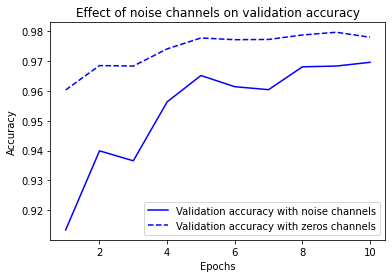

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

noise를 추가한 모델은 accuracy 가 떨어짐 (overfitting의 가능성이 커짐)  
만약 어떤 feature이 imformative 한지 distracting 한지 모른다면 feature selection 을 한다.  

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

machine learning model 에서 어떤것이든 적합하도록 훈련할 수 있다.  
-> MNIST set의 labels를 섞어서 훈련해도 적합이 가능 (물론 generalization은 불가!) 

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

#### The manifold hypothesis

- 고차원 데이터라 할지라도, 실질적으로 해당 데이터를 나타내주는 저차원 공간인 manifold가 존재한다.   
근데 약간 어려움 뭔말인지잘모르겠다 

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

왜 validation set이 필요할까?  
-> layor 수, layor 유닛 등 hyperparameter를 tuning 하기 위함

#### Simple hold-out validation

단순히 training set 과 validation set 을 나누는 것  
훈련 세트로 모델 훈련, 검증 세트로 평가 -> 튜닝 -> 훈련 -> 평가 -> ... 반복  
hyperparameter 튜닝이 끝나면 test데이터 제외한 data로 최종 모델 훈련 

#### K-fold validation

data를 k개의 fold로 나누고 각 분할 i에 대해 남은 k-1개로 training, 1개로 test  
-> k번 반복 -> k개 fold 의 평균 검증 점수  
hyperparameter 튜닝이 끝나면 test데이터 제외한 data로 최종 모델 훈련 

#### Iterated K-fold validation with shuffling

가용 데이터가 적고 정확히 평가하고자 할 때 사용  
K-fold cv를 여러번 적용하되 K개의 분할로 나누기 전 매번 데이터를 무작위로 섞음

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

- 대표성 있는 데이터
- 시간의 방향
- 데이터 중복

## Improving model fit

### Tuning key gradient descent parameters

when training doesn't get started or stalls too early (loss stuck)  

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), # 학습률 1 (high)
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 865.9658 - accuracy: 0.3365 - val_loss: 2.4330 - val_accuracy: 0.2841
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 4.7674 - accuracy: 0.2365 - val_loss: 2.3195 - val_accuracy: 0.2459
Epoch 3/10
375/375 [==============================] - 7s 18ms/step - loss: 2.8924 - accuracy: 0.2351 - val_loss: 3.3490 - val_accuracy: 0.2449
Epoch 4/10
375/375 [==============================] - 6s 17ms/step - loss: 2.5750 - accuracy: 0.2297 - val_loss: 2.6816 - val_accuracy: 0.2053
Epoch 5/10
375/375 [==============================] - 6s 16ms/step - loss: 2.7110 - accuracy: 0.2528 - val_loss: 2.4032 - val_accuracy: 0.2803
Epoch 6/10
375/375 [==============================] - 6s 15ms/step - loss: 2.6458 - accuracy: 0.2524 - val_loss: 2.2213 - val_accuracy: 0.2567
Epoch 7/10
375/375 [==============================] - 5s 15ms/step - loss: 2.7842 - accuracy: 0.2665 - val_loss: 2.1184 - val_accuracy: 0.26

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), # 학습률 1e-2 (appropriate)
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 13ms/step - loss: 0.3846 - accuracy: 0.9104 - val_loss: 0.1419 - val_accuracy: 0.9607
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.1380 - accuracy: 0.9651 - val_loss: 0.1859 - val_accuracy: 0.9585
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1099 - accuracy: 0.9732 - val_loss: 0.1613 - val_accuracy: 0.9692
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0980 - accuracy: 0.9779 - val_loss: 0.2019 - val_accuracy: 0.9680
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0880 - accuracy: 0.9811 - val_loss: 0.1978 - val_accuracy: 0.9703
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0757 - accuracy: 0.9839 - val_loss: 0.2777 - val_accuracy: 0.9702
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0707 - accuracy: 0.9863 - val_loss: 0.2389 - val_accuracy: 0.9717

try  
- learning rate 조절
- batch size 높이기

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6779 - accuracy: 0.8319 - val_loss: 0.3631 - val_accuracy: 0.8998
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3520 - accuracy: 0.9033 - val_loss: 0.3075 - val_accuracy: 0.9152
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3158 - accuracy: 0.9118 - val_loss: 0.2897 - val_accuracy: 0.9194
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2997 - accuracy: 0.9163 - val_loss: 0.2815 - val_accuracy: 0.9205
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2896 - accuracy: 0.9191 - val_loss: 0.2764 - val_accuracy: 0.9231
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2830 - accuracy: 0.9211 - val_loss: 0.2712 - val_accuracy: 0.9250
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2781 - accuracy: 0.9222 - val_loss: 0.2698 - val_accuracy: 0.9268
Epoch 

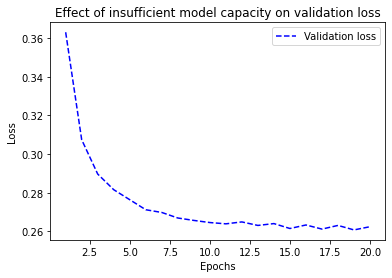

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

-> layer을 늘리거나 more parameters가 있는 layer를 사용

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 0.3527 - accuracy: 0.9002 - val_loss: 0.1890 - val_accuracy: 0.9463
Epoch 2/20
375/375 [==============================] - 3s 7ms/step - loss: 0.1552 - accuracy: 0.9537 - val_loss: 0.1271 - val_accuracy: 0.9615
Epoch 3/20
375/375 [==============================] - 3s 9ms/step - loss: 0.1091 - accuracy: 0.9664 - val_loss: 0.1099 - val_accuracy: 0.9674
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0827 - accuracy: 0.9755 - val_loss: 0.1027 - val_accuracy: 0.9687
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0658 - accuracy: 0.9798 - val_loss: 0.0944 - val_accuracy: 0.9712
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0535 - accuracy: 0.9844 - val_loss: 0.0935 - val_accuracy: 0.9735
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0451 - accuracy: 0.9863 - val_loss: 0.0901 - val_accuracy: 0.9752
Epoch 

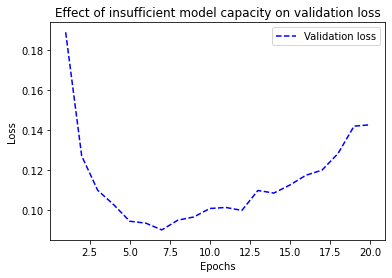

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

-> 8 ephocs 이후 overfitting 발생

## Improving generalization

### Dataset curation

- enough data
- minimize labeling errors
- clean your data and deal with missing values
- many feature -> feature selection

### Feature engineering

특성을 더 간단한 방식으로 표현  
 ex) 2차원 픽셀 데이터(시계_원본) -> 시계바늘의 좌표 -> 시계 바늘의 각도

 - good features allow you to solve problems using fewer resources
 - good features let you slve a problem with far less data

### Using early stopping

모델이 minimum possible training loss 에 도달하기 전에 training을 중단 ---> 왜......???

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5142 - accuracy: 0.7929 - val_loss: 0.4015 - val_accuracy: 0.8511
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3114 - accuracy: 0.9027 - val_loss: 0.3077 - val_accuracy: 0.8841
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2304 - accuracy: 0.9253 - val_loss: 0.3096 - val_accuracy: 0.8767
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1799 - accuracy: 0.9419 - val_loss: 0.2733 - val_accuracy: 0.8911
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1449 - accuracy: 0.9534 - val_loss: 0.2837 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1210 - accuracy: 0.9629 - val_loss: 0.2902 - val_accuracy: 0.8884
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1006 - accurac

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.6221 - accuracy: 0.6719 - val_loss: 0.5568 - val_accuracy: 0.8101
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4971 - accuracy: 0.8549 - val_loss: 0.4648 - val_accuracy: 0.8586
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4040 - accuracy: 0.8978 - val_loss: 0.3979 - val_accuracy: 0.8776
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3345 - accuracy: 0.9123 - val_loss: 0.3506 - val_accuracy: 0.8835
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2827 - accuracy: 0.9233 - val_loss: 0.3318 - val_accuracy: 0.8796
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2455 - accuracy: 0.9316 - val_loss: 0.2996 - val_accuracy: 0.8901
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2163 - accuracy: 0.9385 - val_loss: 0.2876 - val_accuracy: 0.8900
Epoch 8/20
30

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 12s 392ms/step - loss: 0.5435 - accuracy: 0.7607 - val_loss: 0.3344 - val_accuracy: 0.8651
Epoch 2/20
30/30 [==============================] - 13s 446ms/step - loss: 0.2674 - accuracy: 0.8931 - val_loss: 0.2835 - val_accuracy: 0.8923
Epoch 3/20
30/30 [==============================] - 9s 291ms/step - loss: 0.1493 - accuracy: 0.9482 - val_loss: 0.3133 - val_accuracy: 0.8851
Epoch 4/20
30/30 [==============================] - 9s 291ms/step - loss: 0.0843 - accuracy: 0.9740 - val_loss: 0.3790 - val_accuracy: 0.8836
Epoch 5/20
30/30 [==============================] - 9s 291ms/step - loss: 0.0814 - accuracy: 0.9773 - val_loss: 0.3580 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 13s 437ms/step - loss: 0.0047 - accuracy: 0.9994 - val_loss: 0.5198 - val_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 14s 479ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.6264 - val_accuracy: 0.8881
Ep

### graph

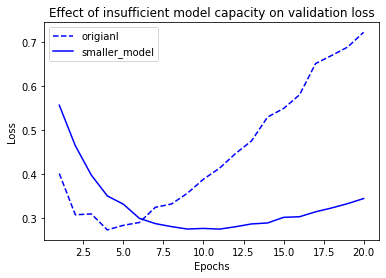

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_smaller_model.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="origianl")
plt.plot(epochs, val_loss2, "b-",
         label="smaller_model")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 작은 네트워크가 original 네트워크보다 나중에 overfitting됨

#### Adding weight regularization

simple model -> parameter values less entropy   
- L1 norm : weight의 절댓값에 비례하는 비용 추가
- L2 norm : weight의 제곱에 비례하는 비용 추가 

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 50ms/step - loss: 0.5873 - accuracy: 0.7808 - val_loss: 0.4614 - val_accuracy: 0.8629
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3962 - accuracy: 0.8941 - val_loss: 0.3860 - val_accuracy: 0.8837
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3329 - accuracy: 0.9127 - val_loss: 0.3609 - val_accuracy: 0.8904
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3001 - accuracy: 0.9231 - val_loss: 0.3544 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2766 - accuracy: 0.9317 - val_loss: 0.3677 - val_accuracy: 0.8801
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2643 - accuracy: 0.9369 - val_loss: 0.3642 - val_accuracy: 0.8820
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2566 - accuracy: 0.9385 - val_loss: 0.3566 - val_accuracy: 0.8855
Epoch 8/20
30

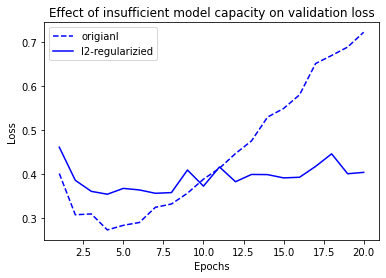

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_original.history["val_loss"]
val_loss2 = history_l2_reg.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="origianl")
plt.plot(epochs, val_loss2, "b-",
         label="l2-regularizied")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# l2규제를 사용한 model이 기본 모델보다 overfitting에 잘 버팀 

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

- 무작위로 일부 출력 특성 제외  
ex) [0.2,0.5,1.2,0.8,1.1] -> [0,0.5,1.2,0,1.1]
- text 단계에서는 어떤 unit도 dropout되지 않음
- test 단계에서는 dropout 비율에 비례해 출력을 줄여 주어야 함


```
layor_output *= 0.5 #(at test)
```

```
layor_output *= random.randint(0,high=2,size=layer_output.shape)
layer_output /=0.5 #(in training)
```



**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.6497 - accuracy: 0.6053 - val_loss: 0.5773 - val_accuracy: 0.6931
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.5581 - accuracy: 0.7647 - val_loss: 0.5132 - val_accuracy: 0.8478
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.5014 - accuracy: 0.8461 - val_loss: 0.4747 - val_accuracy: 0.8371
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4522 - accuracy: 0.8827 - val_loss: 0.4560 - val_accuracy: 0.8568
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.4199 - accuracy: 0.9017 - val_loss: 0.4358 - val_accuracy: 0.8763
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3886 - accuracy: 0.9151 - val_loss: 0.4287 - val_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3607 - accuracy: 0.9249 - val_loss: 0.4276 - val_accuracy: 0.8807
Epoch 8/20
30

### Summary

overfitting을 줄이기 위한 방법  
- 훈련 데이터를 더 모은다.
- network 용량을 감소시킨다.
- 가중치 규제를 추가한다.
- dropout을 추가한다.